<a href="https://colab.research.google.com/github/sarahajbane/colab_workbook_templates/blob/main/Multivariate_Analysis_220125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate EDA
Multivariate analysis is the process of analyzing data that involves three or more variables to understand their relationships and interactions. It goes beyond univariate (single variable) and bivariate (two variables) analysis to explore complex patterns in datasets.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#loading dataset
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
#checking missing values
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [ ]:
#droping the null values for the next step
penguins=penguins.dropna()

## Categorical with Categorical Column

The basis of comparing categorical columns is still counting. A crosstab is a great start to a quick and simple visualisation.

In [ ]:
# Creating a cross-tabulation to show the distribution of penguin species by sex.
# The results are normalized by the index (species) to show proportions within each species.
pd.crosstab(index=penguins['species'],columns=penguins['sex'],normalize='index')

sex,Female,Male
species,,
Adelie,0.500000,0.500000
Chinstrap,0.500000,0.500000
Gentoo,0.487395,0.512605


### **Barplots**

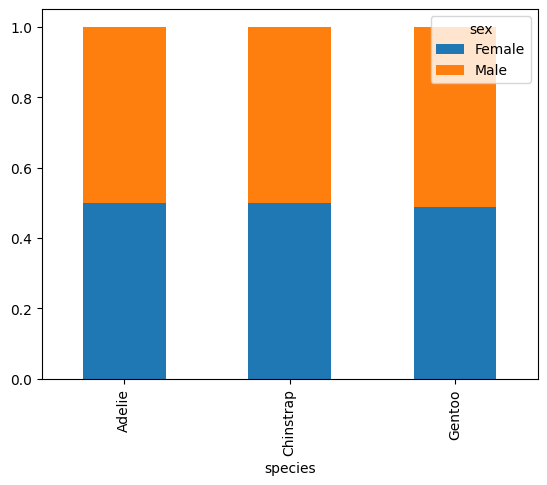

In [ ]:
# Creating a stacked bar plot to visualize the distribution of penguin species by sex.
# The plot is based on a cross-tabulation, with the values normalized by species (index) to show proportions.
ax=pd.crosstab(index=penguins["species"], columns=penguins["sex"],normalize='index').plot(kind="bar",stacked= True)


**With Seaborn**

<Axes: xlabel='island', ylabel='count'>

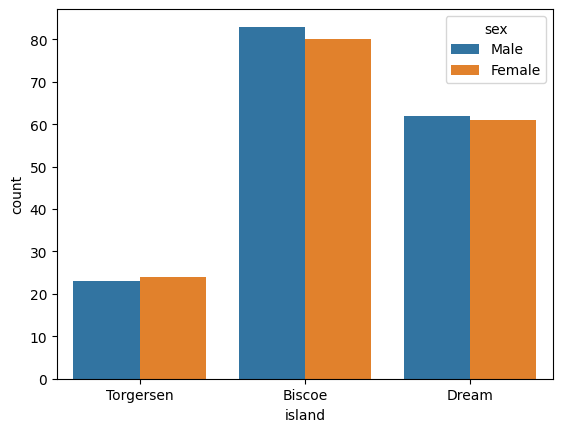

In [ ]:
# Creating a count plot to visualize the distribution of penguins across different islands,
# with the counts split by sex using the hue parameter.
sns.countplot(data=penguins,x="island",hue='sex')

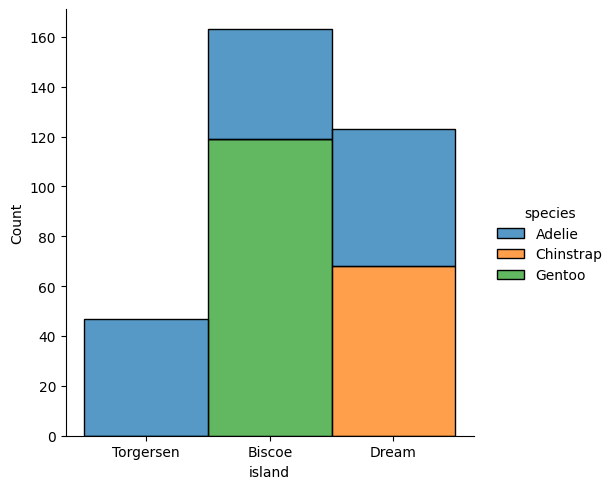

In [ ]:
# Creating a stacked bar plot using Seaborn's displot to visualize the distribution of penguins across different islands,
# with the bars stacked by species.
sns.displot(penguins, x='island', hue='species', multiple='stack')

### **Pieplots**

In [ ]:
# Creating a cross-tabulation to show the count of penguins by species and sex.
# The rows represent species, and the columns represent sex.
pd.crosstab(index=penguins["species"], columns=penguins["sex"])

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


array([<Axes: ylabel='Female'>, <Axes: ylabel='Male'>], dtype=object)

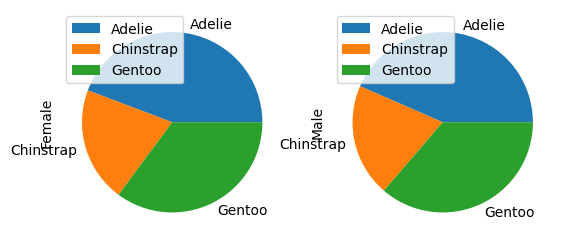

In [ ]:
# Creating a pie chart for the cross-tabulation of penguin species and sex.
# Each pie chart represents the distribution of sex within each species.
# The `subplots=True` parameter creates separate pie charts for each species.
pd.crosstab(index=penguins["species"], columns=penguins["sex"]).plot(kind="pie",subplots=True)

array([<Axes: ylabel='Adelie'>, <Axes: ylabel='Chinstrap'>,
       <Axes: ylabel='Gentoo'>], dtype=object)

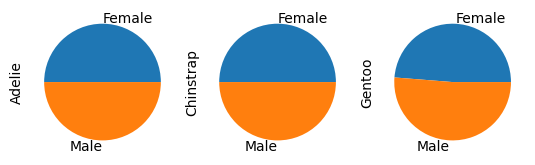

In [ ]:
# Creating a pie chart for the cross-tabulation of penguin species and sex with customization.
# Each pie chart represents the distribution of species by sex.
# The legend is removed with `legend=False`, and subplots are created for each sex category.
pd.crosstab(columns=penguins["species"], index=penguins["sex"]).plot(kind="pie",subplots=True,legend=False)


**Exercis_1**
Create a Categorical with Categorical Column plots for the tips dataser.

In [ ]:
#loading a tips dataset from seaborn
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='time'>

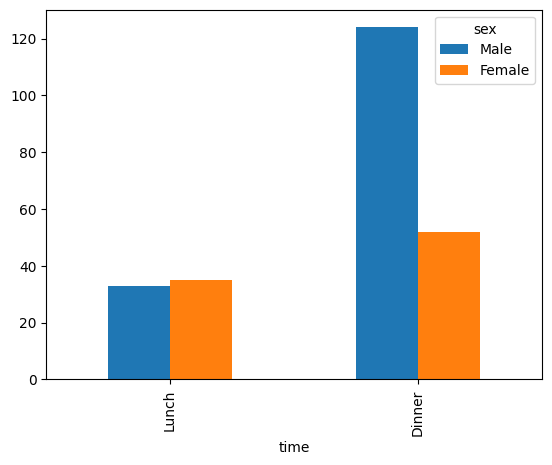

In [ ]:
# Creating a bar plot to visualize the distribution of sex across different times (lunch or dinner)
#using a cross-tabulation of the 'time' and 'sex' columns from the tips dataset.
pd.crosstab(index=tips["time"], columns=tips["sex"]).plot(kind='bar')

array([<Axes: ylabel='Male'>, <Axes: ylabel='Female'>], dtype=object)

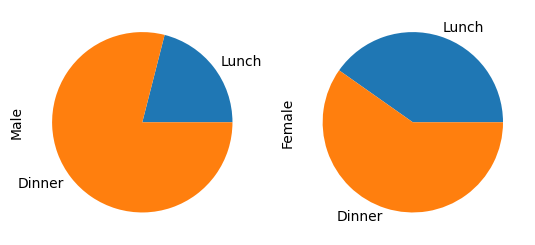

In [ ]:
# Creating a pie chart to visualize the distribution of sex across different times (lunch or dinner)
#using a cross-tabulation of the 'time' and 'sex' columns from the tips dataset.
# Each pie chart represents the proportion of sex within each time category, with the legend removed for clarity.
pd.crosstab(index=tips["time"], columns=tips["sex"]).plot(kind="pie",subplots=True,legend=False)

<Axes: xlabel='day', ylabel='count'>

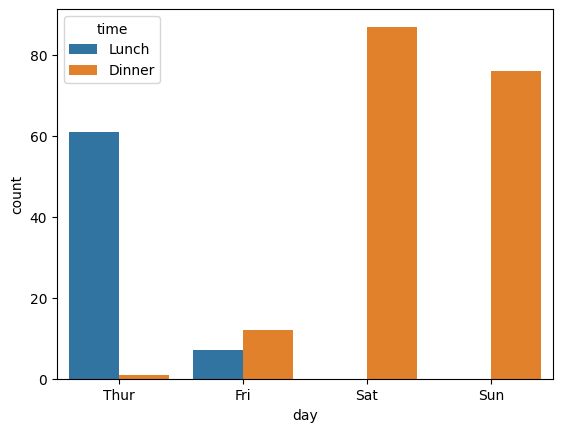

In [ ]:
# Creating a count plot to visualize the distribution of the number of tips across different days of the week,
# with the data split by time (lunch or dinner) using the hue parameter.
sns.countplot(data=tips,x="day",hue='time')

## Numerical with Categorical Column

### **Histogram**

<Axes: xlabel='body_mass_g', ylabel='Count'>

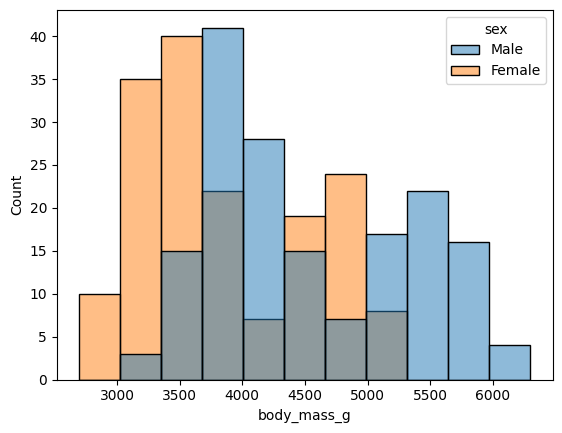

In [ ]:
# Creating a histogram to visualize the distribution of body mass for penguins,
# with the data split by sex using the hue parameter to differentiate between male and female penguins.
sns.histplot(data=penguins, x= "body_mass_g",hue='sex')

In [ ]:
# Better
sns.kdeplot(data=penguins, x = "body_mass_g", hue='sex')

### **Kernel Density Estimation (KDE)**

<Axes: xlabel='body_mass_g', ylabel='Count'>

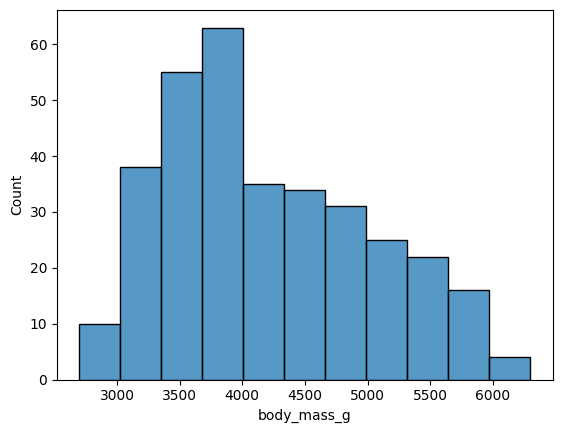

In [ ]:
# Creating a histogram to visualize the distribution of body mass for penguins.
# The `fill=True` parameter fills the bars to enhance the visualization of the distribution.
sns.histplot(data=penguins, x = "body_mass_g",fill=True)

<Axes: xlabel='body_mass_g', ylabel='Density'>

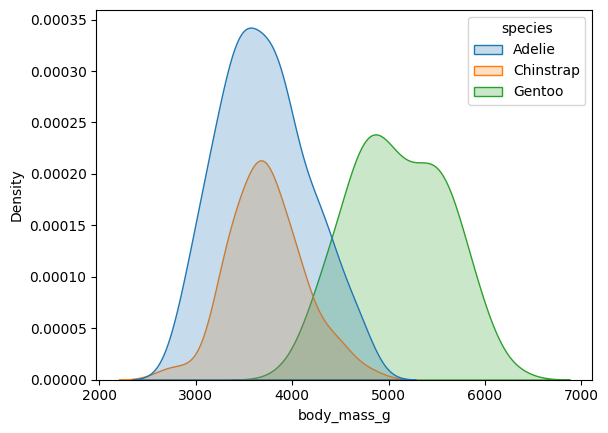

In [ ]:
# Creating a kernel density estimation (KDE) plot to visualize the distribution of body mass for penguins.
# The plot is separated by species using the hue parameter, and the areas under the curves are filled for better visualization.
sns.kdeplot(data=penguins, x = "body_mass_g",hue='species',fill=True)

### **Boxplot**

<Axes: xlabel='species', ylabel='body_mass_g'>

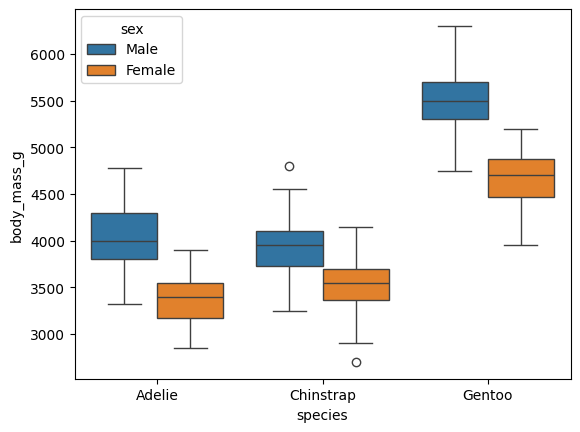

In [ ]:
# Creating a box plot to visualize the distribution of body mass for penguins across different species.
# The plot is further separated by sex using the hue parameter to show differences between male and female penguins.
sns.boxplot(data=penguins, y="body_mass_g",x="species",hue="sex")

### **Violinplot**

<Axes: xlabel='species', ylabel='flipper_length_mm'>

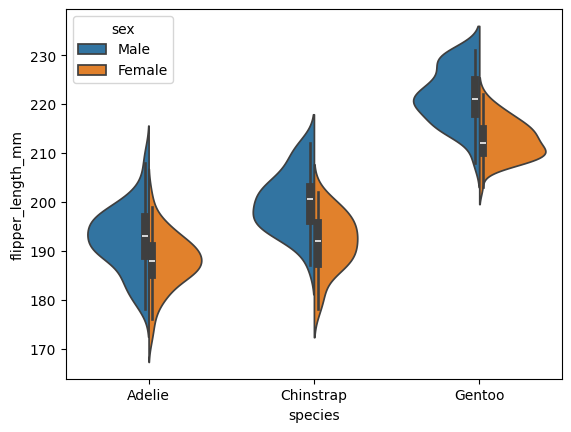

In [ ]:
# Creating a violin plot to visualize the distribution of flipper length for penguins across different species.
# The plot is split by sex using the `split=True` parameter, allowing for a comparison of male and female penguins within each species.
sns.violinplot(data=penguins, y="flipper_length_mm", x="species", hue="sex",split=True)

### **Barplot**

<Axes: >

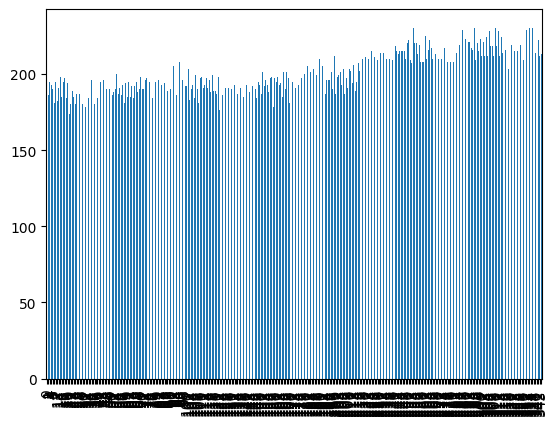

In [ ]:
# Creating a bar plot to visualize the flipper length of all penguins in the dataset.
# Each bar represents the flipper length of an individual penguin.
penguins["flipper_length_mm"].plot(kind="bar")

<BarContainer object of 333 artists>

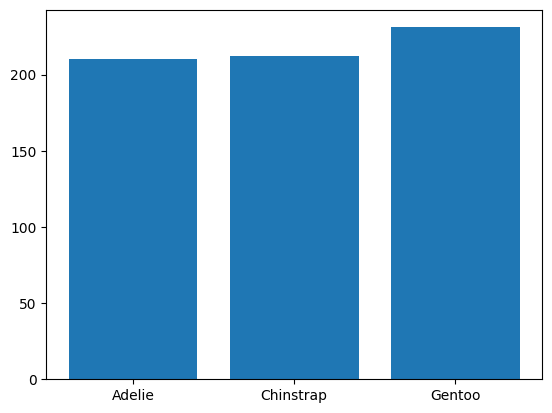

In [ ]:
# Creating a bar plot to visualize the flipper length of penguins across different species.
# Each bar represents the average flipper length for a specific species.
plt.bar(x=penguins["species"],height=penguins["flipper_length_mm"])

<BarContainer object of 333 artists>

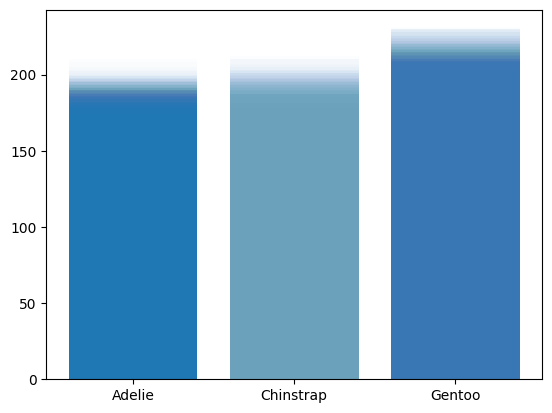

In [ ]:
# Creating a bar plot to visualize the flipper length of penguins for each species.
# Note: The alpha value is set to 0.01, making the bars almost transparent.
plt.bar(x=penguins["species"],height=penguins["flipper_length_mm"],alpha=0.01)

Matplotlib does not auto-aggregate, it just overlaps

<Axes: xlabel='species', ylabel='flipper_length_mm'>

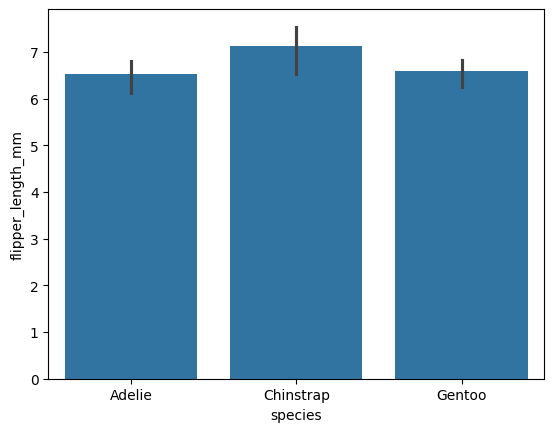

In [ ]:
# Creating a bar plot using Seaborn to show the standard deviation of flipper length
# for each penguin species. The error bars represent a 60% confidence interval.
sns.barplot(penguins,x="species",y="flipper_length_mm",estimator="std",errorbar=('ci',60))

Seaborn aggregates automatically, uses errorbar

**Exercise_2**
Create  Numerical with Categorical Column

In [ ]:
flight=sns.load_dataset('flights')
flight

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<BarContainer object of 144 artists>

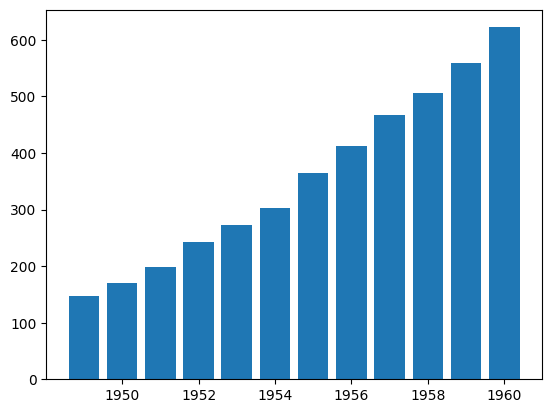

In [ ]:
#example bar plot
plt.bar(x=flight["year"],height=flight["passengers"])

###**Heatmap**

In [ ]:
# Creating a pivot table to reorganize the flight dataset.
# Rows represent months, columns represent years, and the cell values represent the number of passengers.
flight_pivot=flight.pivot_table(index='month',columns='year',values='passengers')

<ipython-input-67-091278bee4d7>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flight_pivot=flight.pivot_table(index='month',columns='year',values='passengers')


In [ ]:
flight_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

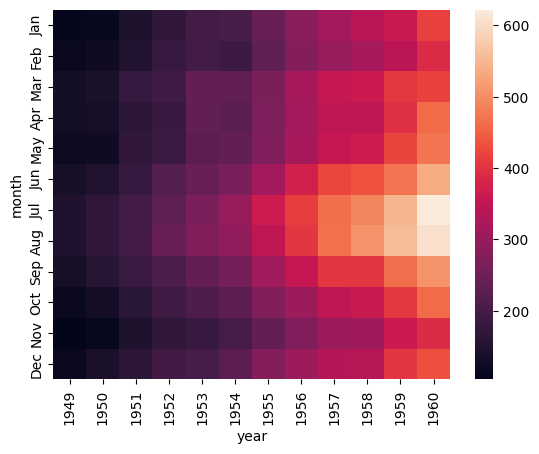

In [ ]:
# Generating a heatmap to visualize the pivot table data.
sns.heatmap(flight_pivot)

## Numerical with Numerical

### **KDE Plot**

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

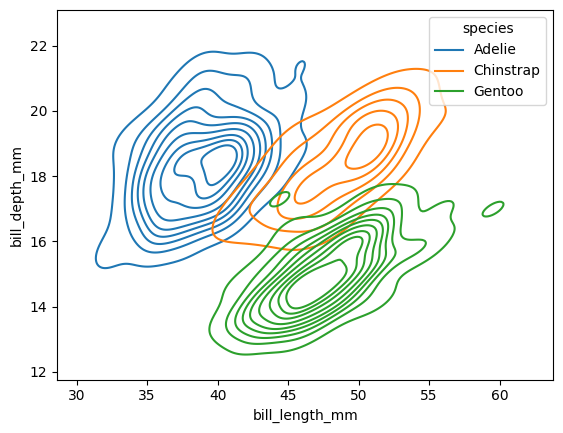

In [ ]:
# Creating a kernel density estimation (KDE) plot to visualize the joint distribution
# of bill length and bill depth for penguins. The plot is separated by species using the hue parameter.
sns.kdeplot(data=penguins, x = "bill_length_mm", y="bill_depth_mm", hue = "species")

### **Scatterplot**

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

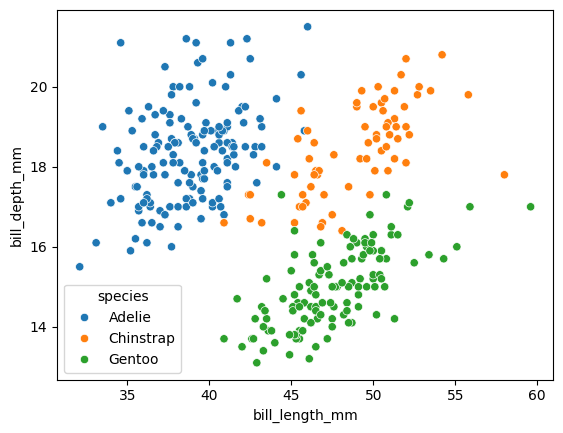

In [ ]:
# Creating a scatter plot to visualize the relationship between bill length and bill depth for penguins.
# Points are colored by species using the hue parameter.
sns.scatterplot(data=penguins,x="bill_length_mm" ,y="bill_depth_mm",hue="species")

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

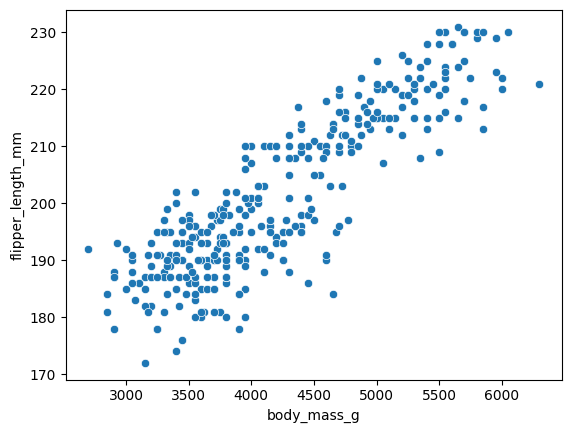

In [ ]:
# Creating a scatter plot to visualize the relationship between body mass and flipper length for penguins.
sns.scatterplot(data=penguins,x="body_mass_g" ,y="flipper_length_mm")

### **Lineplot**

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

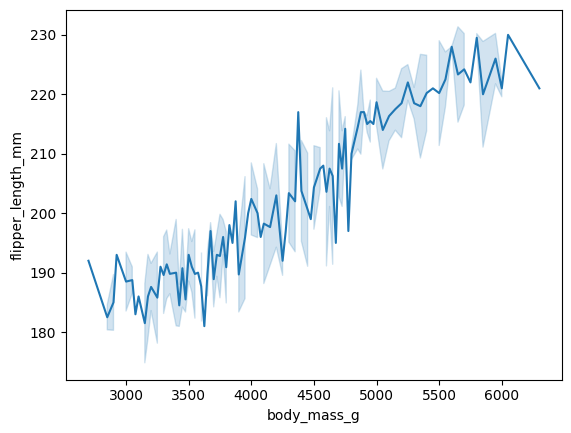

In [ ]:
# Creating a line plot to show the relationship between body mass and flipper length for penguins.
# Error bars represent the standard deviation (sd) at each data point.
sns.lineplot(data=penguins,x="body_mass_g" ,y="flipper_length_mm",errorbar="sd")

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

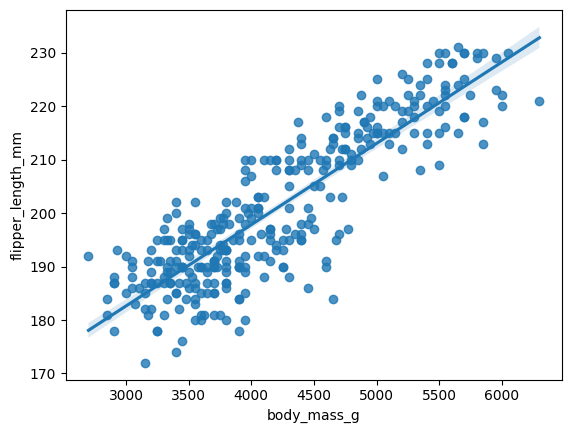

In [ ]:
# Creating a regression plot to visualize the relationship between body mass and flipper length for penguins.
# The plot includes a linear regression line and a scatter plot of data points.
sns.regplot(data=penguins,x="body_mass_g" ,y="flipper_length_mm")

## Combined Plots in Seaborn

### **Pairplot**

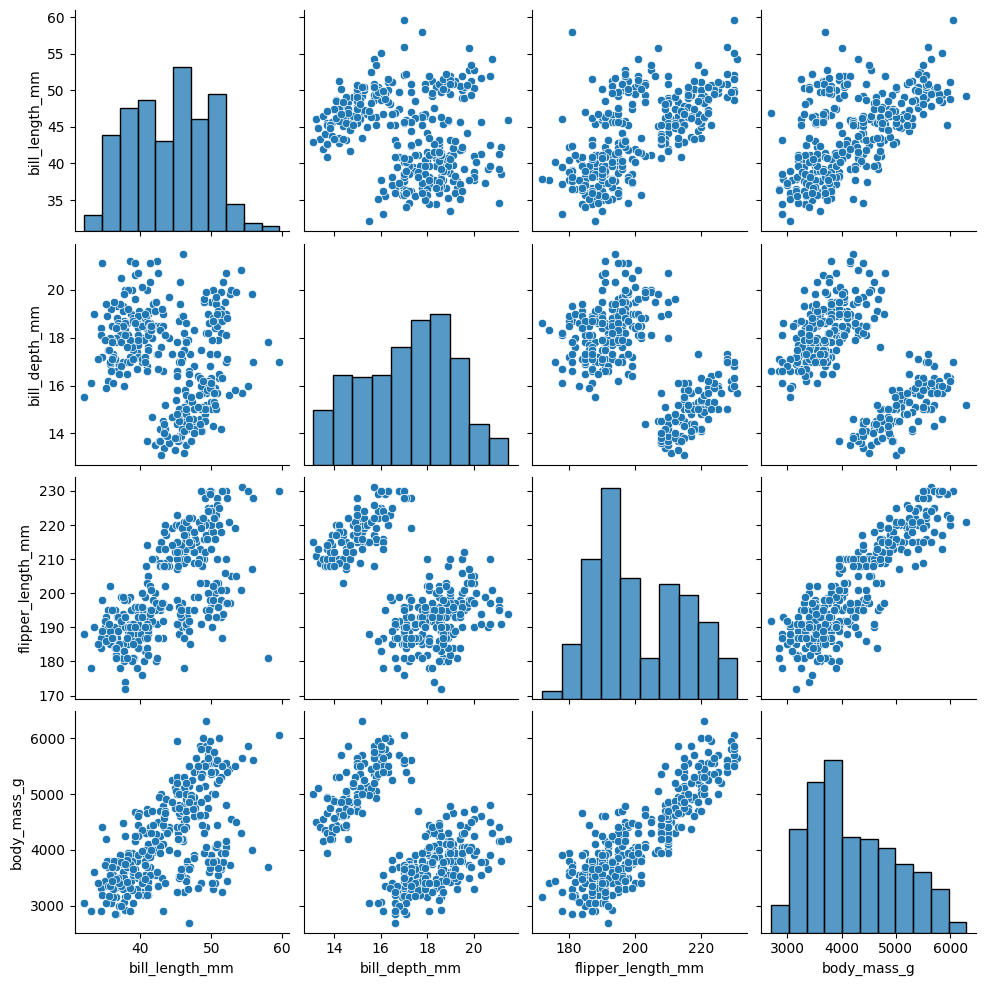

In [ ]:
# Creating a pair plot to visualize pairwise relationships between numerical features in the penguins dataset.
# The plot includes scatter plots for feature pairs and histograms for individual features.
sns.pairplot(penguins)

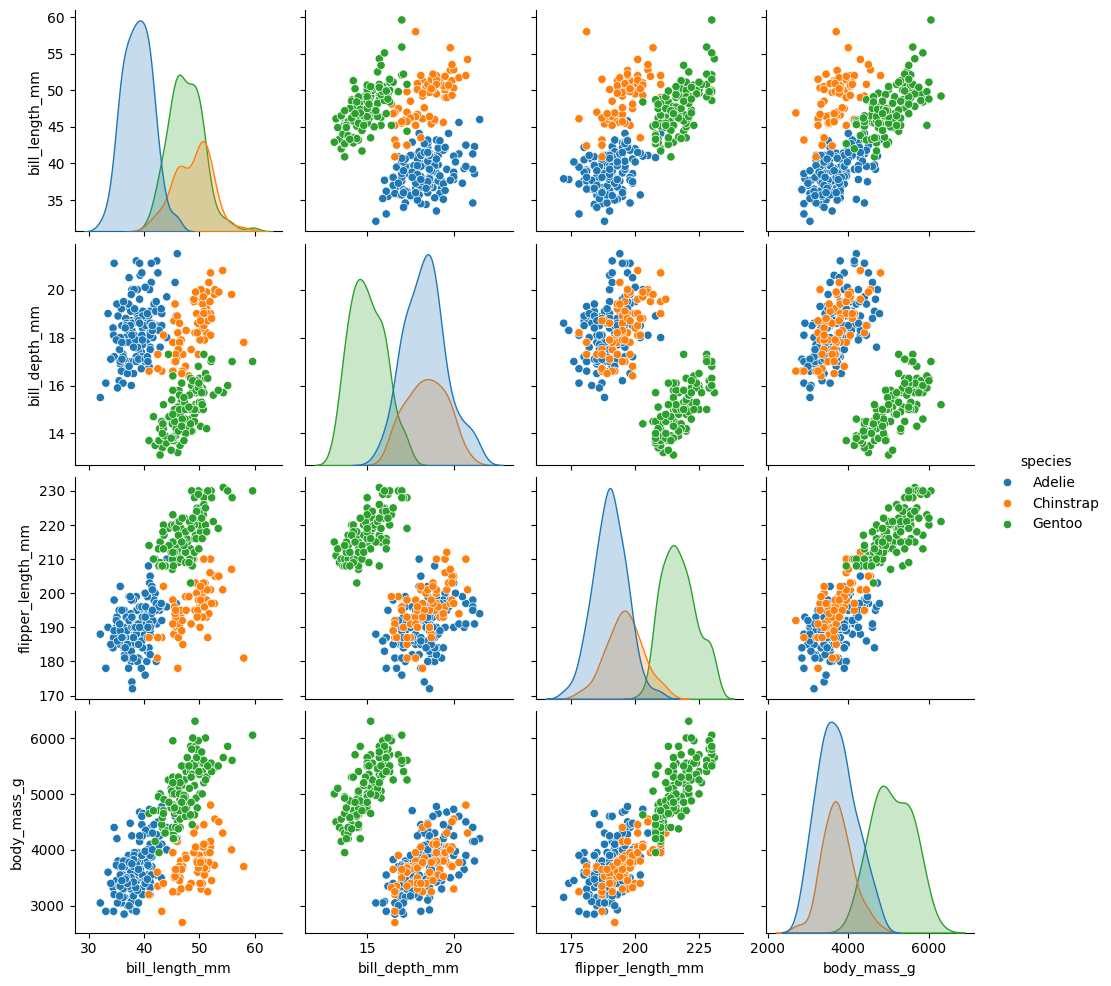

In [ ]:
# Creating a pair plot to visualize pairwise relationships between numerical features in the penguins dataset,
# with points colored by species using the hue parameter for differentiation.
sns.pairplot(penguins,hue="species")

### **Jointplot**

A jointplot gives you a two-columns visualisation in the middle and two one-column visualisations in the margins, to understand distributions better:

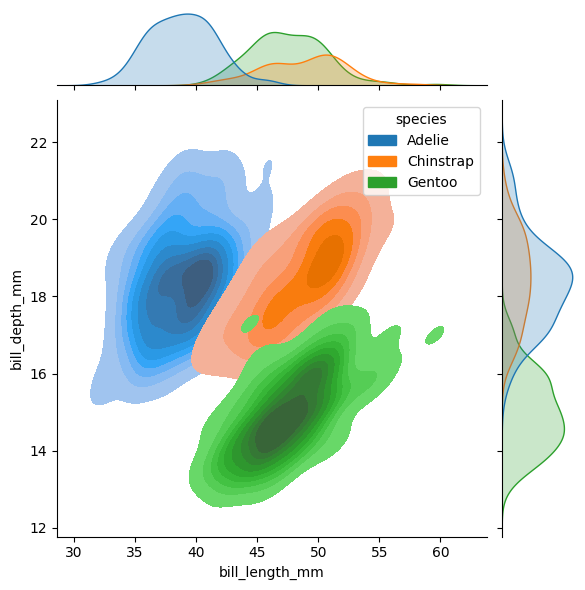

In [ ]:
# Creating a joint plot to visualize the relationship between bill length and bill depth for penguins.
# The plot uses a kernel density estimate (KDE) with filled contours, and points are colored by species using the hue parameter.
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",fill=True
)

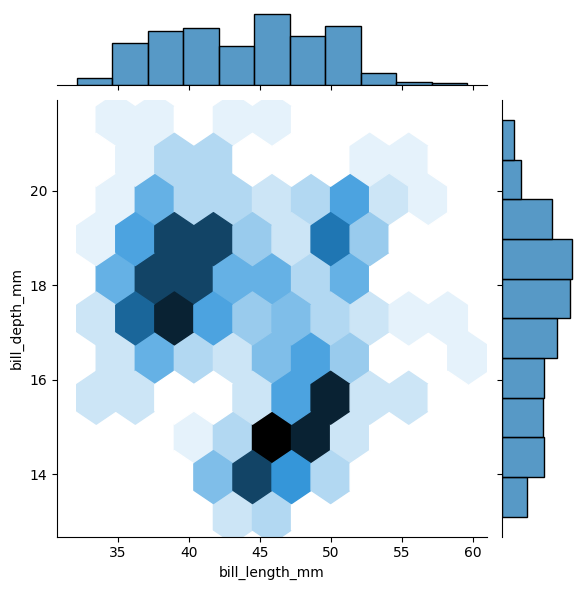

In [ ]:
# Creating a hexbin joint plot to visualize the relationship between bill length and bill depth for penguins.
# The plot uses hexagonal bins to represent the density of data points in each region of the plot.
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm",
    kind="hex"
)

The generalized version of a jointplot is a JointGrid, where you can choose the types of visualisation to use for middle and margin independently:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


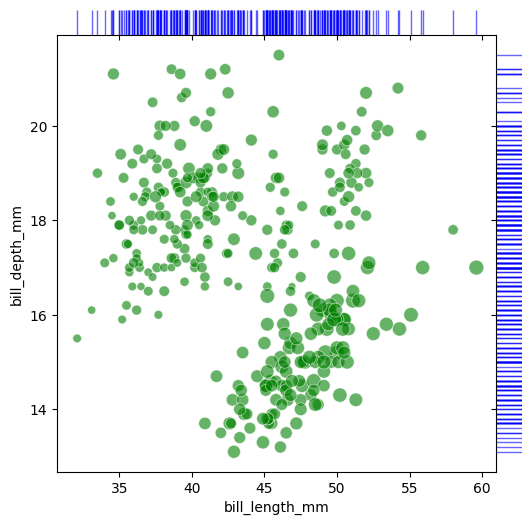

In [ ]:
# Creating a custom JointGrid to visualize the relationship between bill length and bill depth for penguins,
# with additional customization:
# - The scatter plot includes body mass as the point size, with the size range from 30 to 120.
# - The scatter points are colored green (alpha = 0.6) and no legend is displayed.
# - Marginal plots show the distribution of bill length and bill depth with rug plots in blue (alpha = 0.6).
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=penguins["body_mass_g"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="b", alpha=.6)

**Exercise_3**
Create plots and multivariate analysis for the tips dataset.

In [ ]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Additional Ressources

* [From Data to Viz](https://www.data-to-viz.com/)
* [Seaborn Errorbar Explanation](https://seaborn.pydata.org/tutorial/error_bars.html)
* [Seaborn Example Library](https://seaborn.pydata.org/examples/index.html)

**Thank you!**

 **Keep Practicing..**